In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import pandas as pd

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
station = pd.read_sql("SELECT * from Station", conn)
measurements = pd.read_sql("SELECT * FROM measurement", conn)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
measurements.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [12]:
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Query Dates

In [14]:
results_measurement = session.query(Measurement.id, Measurement.station,\
                        Measurement.date, Measurement.prcp,\
                       Measurement.tobs)
results_station = session.query(Station.id, Station.station, Station.name,\
                               Station.latitude, Station.longitude, Station.\
                               elevation)

ax = [result[2] for result in results_measurement]
ax = pd.DataFrame(ax)

last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

#precipitation = engine.execute("SELECT date,prcp  FROM measurement WHERE date > '2017-01-01'").fetchall()
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()




2016-08-23


,precipitation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02


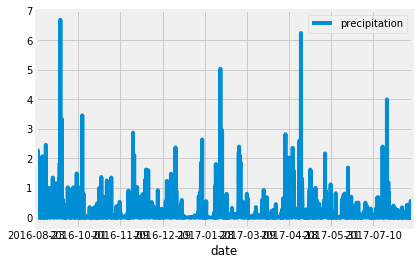

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
df_precipitation = pd.DataFrame(precipitation, columns=['date','precipitation'])
df_precipitation = df_precipitation.fillna(0.00)

# Perform a query to retrieve the data and precipitation scores
df_precipitation = df_precipitation.set_index('date')
# Save the query results as a Pandas DataFrame and set the index to the date column
df_precipitation.plot()
# Sort the dataframe by date
df_precipitation.head()
# Use Pandas Plotting with Matplotlib to plot the data


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precipitation['precipitation'].describe()

count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: precipitation, dtype: float64

# Station
Design a query to calculate the total number of stations.


Design a query to find the most active stations.


List the stations and observation counts in descending order.


Which station has the highest number of observations?


Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.




Design a query to retrieve the last 12 months of temperature observation data (tobs).


Filter by the station with the highest number of observations.


Plot the results as a histogram with bins=12.

In [17]:
measurements.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [18]:
# Design a query to show how many stations are available in this dataset?
for row in session.query(Station, Station.station).all():
    print(row)

(<sqlalchemy.ext.automap.station object at 0x11a20d908>, 'USC00519397')
(<sqlalchemy.ext.automap.station object at 0x11a20d898>, 'USC00513117')
(<sqlalchemy.ext.automap.station object at 0x11a20d7b8>, 'USC00514830')
(<sqlalchemy.ext.automap.station object at 0x11a20d6d8>, 'USC00517948')
(<sqlalchemy.ext.automap.station object at 0x11a20d668>, 'USC00518838')
(<sqlalchemy.ext.automap.station object at 0x11a20d2b0>, 'USC00519523')
(<sqlalchemy.ext.automap.station object at 0x11a20d208>, 'USC00519281')
(<sqlalchemy.ext.automap.station object at 0x11a20d160>, 'USC00511918')
(<sqlalchemy.ext.automap.station object at 0x11a20d0b8>, 'USC00516128')


In [19]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).all()
stations = pd.DataFrame(stations)
stations.count()

station    9
dtype: int64

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,
    func.count(Measurement.station).label('qty')
    ).group_by(Measurement.station
    ).order_by(('qty')).all()

most_active_stations

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [21]:
measurements.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(Measurement.station,
    func.min(Measurement.tobs).label('min'),
    func.max(Measurement.tobs).label('max'),
    func.avg(Measurement.tobs).label('avg')
    ).group_by(Measurement.station
    ).all()

temp


[('USC00511918', 53.0, 87.0, 71.61596766043456),
 ('USC00513117', 59.0, 85.0, 72.68918420081211),
 ('USC00514830', 58.0, 85.0, 74.8732970027248),
 ('USC00516128', 58.0, 84.0, 70.91500765696784),
 ('USC00517948', 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 58.0, 83.0, 72.72407045009784),
 ('USC00519281', 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 56.0, 87.0, 74.55323054331865),
 ('USC00519523', 56.0, 85.0, 74.5436493068565)]

In [23]:
temp_df = pd.DataFrame(temp)
year_before = dt.date(2017,7,31) - dt.timedelta(days=365)
print(year_before)

2016-07-31


In [24]:
USC00517948 = [result for result in results_measurement if result[1] == 'USC00517948']
USC00517948_df = pd.DataFrame(USC00517948)
USC00517948_df.tail()


,id,station,date,prcp,tobs
1367,9003,USC00517948,2017-07-25,0.00,81.0
1368,9004,USC00517948,2017-07-26,NaN,78.0
1369,9005,USC00517948,2017-07-27,NaN,79.0
1370,9006,USC00517948,2017-07-28,0.01,80.0
1371,9007,USC00517948,2017-07-31,NaN,81.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a20d710>]],
      dtype=object)

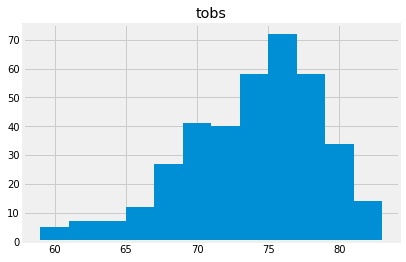

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
all_temps_USC00517948 = session.query(Measurement.station,Measurement.tobs).\
                filter(Measurement.date >= year_before).\
                filter(Measurement.station == 'USC00519281').all()
all_temps_USC00517948
all_temps_USC00517948_df = pd.DataFrame(all_temps_USC00517948)
all_temps_USC00517948_df.hist(bins=12)
#all_temps_USC00517948_df.loc[all_temps_USC00517948_df['tobs'] == 76].count()




In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [142]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2016,7,31','2017,7,31') 
trip = list(np.ravel(trip))
trip

[56.0, 74.14421827631008, 84.0]

Text(0, 0.5, 'Temp (ºF)')

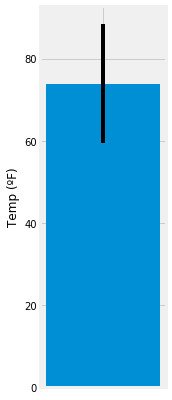

In [98]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
#trip_df = pd.DataFrame(trip, columns=['Min', 'Average', 'Max'])
#trip_df.set_index('Average', inplace=True)

plt.figure(figsize=(2,7))
trip_conditions = calc_temps("2016-7-31", "2017-07-31")[0]
plt.bar(x="", y=0, height=trip_conditions[1], yerr=(trip_conditions[2]-trip_conditions[0])/2)
plt.ylabel('Temp (ºF)')

In [72]:
measurements.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


,Precipitation,Station,Name,Latitude,Longitude,Elevation
0,NaN,USC00517948,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,0.01,USC00514830,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,0.05,USC00511918,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,0.08,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,0.14,USC00516128,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,0.15,USC00519281,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,0.15,USC00519523,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,0.21,USC00518838,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,0.28,USC00513117,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


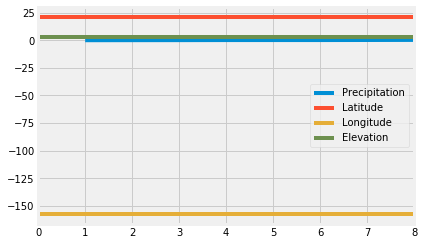

In [197]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_per_weather = session.query(Measurement.prcp,Measurement.station,Station.name, Station.latitude, Station.longitude, Station.elevation).\
                    filter((Measurement.date > dt.date(2016,7,31)) | (Measurement.date < dt.date(2017,7,31))).group_by(Measurement.station).\
                    order_by(Measurement.prcp).all()
rainfall_per_weather_df = pd.DataFrame(rainfall_per_weather, columns=['Precipitation', 'Station', 'Name', 'Latitude',\
                                                                     'Longitude', 'Elevation'])

rainfall_per_weather_df.plot(stacked=False)
rainfall_per_weather_df




## Optional Challenge Assignment

In [190]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.date,func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("07-31")

[('2015-07-31', 72.0, 77.03571428571429, 83.0)]

In [228]:
# ago_15 = daily_normals("08-15")


# for i in range(15,26):
#    print(daily_normals(f"08-{i}"))

normals = [daily_normals(f"08-{i}")[0] for i in range(15,26)]
normals_df = pd.DataFrame(normals, columns=['Dates','MIN','AVG','MAX'])
# dates = session.query(Measurement.date).\
#         filter((Measurement.date > dt.date(2017,8,15)) & (Measurement.date < dt.date(2017,8,25))).all()

normals_df.set_index('Dates')

,MIN,AVG,MAX
Dates,,,
2015-08-15,69.0,76.471698,83.0
2014-08-16,69.0,76.080000,83.0
2017-08-17,69.0,76.125000,83.0
2013-08-18,70.0,76.923077,84.0
2017-08-19,69.0,75.946429,85.0
2011-08-20,68.0,76.452830,82.0
2015-08-21,67.0,76.400000,83.0
2015-08-22,69.0,76.471698,84.0
2010-08-23,67.0,76.692308,87.0


TypeError: object of type 'NoneType' has no len()

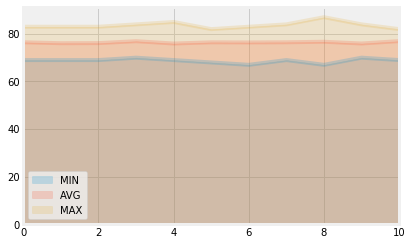

In [230]:

normals_df.plot(kind="area",stacked=False, alpha=.2)
plt.yticks(np.arange(0,100,20))
plt.xticks(ticks=normals_df.index.values, rotation="45")
plt.show()

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [32]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
